Benchmark Results Summary:


,Operation,Scheme,Mean (ms),Std Err (ms)
0,Evaluate,Pairing,5.831707,0.123160
1,Evaluate,Non-Pairing,3.891855,0.246615
2,Verify,Pairing,6.371521,0.048662
3,Verify,Non-Pairing,2.521682,0.021576


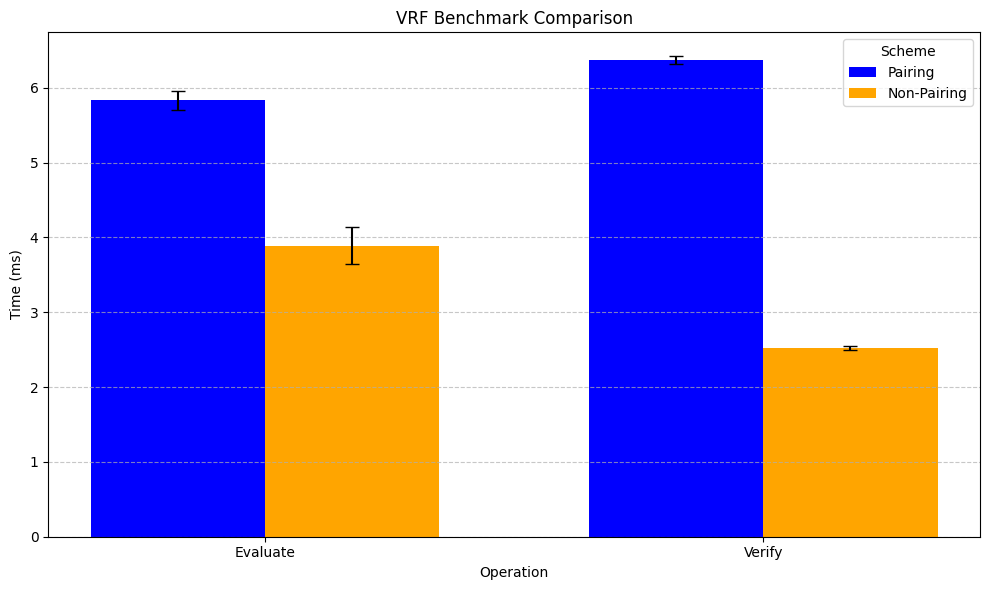

In [ ]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

# Define the base directory where Criterion stores benchmark results
BASE_DIR = Path("../target/criterion/vrf_benchmarks")

# List of benchmark names as defined in the Rust benchmark file
BENCHMARKS = [
    "pairing_vrf_evaluate",
    "pairing_vrf_verify",
    "non_pairing_vrf_evaluate",
    "non_pairing_vrf_verify"
]
  
# Initialize a dictionary to store benchmark data
data = {}

# Extract data from each benchmark's estimates.json file
for bench_name in BENCHMARKS:
    estimates_file = BASE_DIR / bench_name / "new" / "estimates.json"

    # Load the JSON file
    with open(estimates_file, 'r') as f:
        json_data = json.load(f)

    # Extract mean time and standard error, converting from nanoseconds to milliseconds
    mean_time = json_data["mean"]["point_estimate"] / 1_000_000
    std_err = json_data["mean"]["standard_error"] / 1_000_000

    # Parse the benchmark name to determine operation and scheme
    parts = bench_name.split("_vrf_")
    scheme_raw = parts[0]
    operation_raw = parts[1]

    # Map scheme
    if scheme_raw == "pairing":
        scheme = "Pairing"
    elif scheme_raw == "non_pairing":
        scheme = "Non-Pairing"
    else:
        raise ValueError(f"Unknown scheme in {bench_name}")

    # Map operation and capitalize it
    operation = operation_raw.capitalize()

    # Store the data with (operation, scheme) as the key
    data[(operation, scheme)] = {"mean": mean_time, "std_err": std_err}

# Define the operations for plotting
operations = ["Evaluate", "Verify"]

# Create a DataFrame for tabular display
df = pd.DataFrame([
    {
        "Operation": op,
        "Scheme": sch,
        "Mean (ms)": data[(op, sch)]["mean"],
        "Std Err (ms)": data[(op, sch)]["std_err"]
    }
    for op in operations
    for sch in ["Pairing", "Non-Pairing"]
])

print("Benchmark Results Summary:")
display(df)

# Prepare data for plotting
pairing_means = [
    data[("Evaluate", "Pairing")]["mean"],
    data[("Verify", "Pairing")]["mean"]
]
pairing_err = [
    data[("Evaluate", "Pairing")]["std_err"],
    data[("Verify", "Pairing")]["std_err"]
]
non_pairing_means = [
    data[("Evaluate", "Non-Pairing")]["mean"],
    data[("Verify", "Non-Pairing")]["mean"]
]
non_pairing_err = [
    data[("Evaluate", "Non-Pairing")]["std_err"],
    data[("Verify", "Non-Pairing")]["std_err"]
]

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(operations))
bar_width = 0.35

# Plot bars for Pairing scheme
ax.bar(
    index - bar_width/2,
    pairing_means,
    bar_width,
    yerr=pairing_err,
    label="Pairing",
    color='blue',
    capsize=5
)

# Plot bars for Non-Pairing scheme
ax.bar(
    index + bar_width/2,
    non_pairing_means,
    bar_width,
    yerr=non_pairing_err,
    label="Non-Pairing",
    color='orange',
    capsize=5
)

# Customize the plot
ax.set_xlabel('Operation')
ax.set_ylabel('Time (ms)')
ax.set_title('VRF Benchmark Comparison')
ax.set_xticks(index)
ax.set_xticklabels(operations)
ax.legend(title="Scheme")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()